In [1]:
# I'll need these libraries
import requests
import json

In [2]:
with open('uwlibs/allcolls.json', 'r') as file:
        data = file.read()
        collectionsjson = json.loads(data)

# can I avoid the JSONDecodeError!??
On closer inspection of `allcolls.json`, I found the following:

In [3]:
print(collectionsjson[23])

{'alias': '/p16786coll7', 'name': "Darrington Historical Society's SR 530 Landslide Collection", 'path': '/cdm/sites/16786/data/p16786coll7', 'secondary_alias': '3'}


Note that the alias is '3'. Perhaps this isn't being interpreted as a string and is causing the error? (I'm sure that there is a more accurate way to explain this...)

Trying [dmGetCollectionFieldInfo](https://help.oclc.org/Metadata_Services/CONTENTdm/Advanced_website_customization/API_Reference/CONTENTdm_API/CONTENTdm_Server_API_Functions_-_dmwebservices?sl=en#dmGetCollectionFieldInfo) for this collection in a browser, I see that something does in fact go wrong:
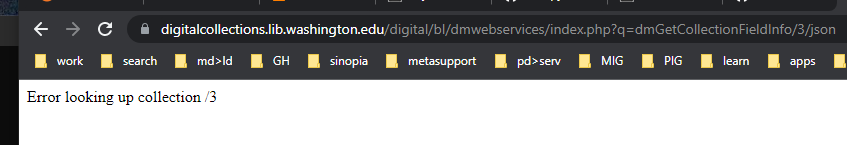

So could I just avoid this collection for the time being?

In [8]:
for coll in collectionsjson:
    if type(coll['secondary_alias']) == int:
        print(f"DELETE - '{coll['secondary_alias']}' - integer!")
    else:
        print(f"OK - '{coll['secondary_alias']}' - string.")
        pass

OK - 'alaskawcanada' - string.
OK - 'ayp' - string.
OK - 'loc' - string.
OK - 'lctext' - string.
OK - 'neareast' - string.
OK - 'ac' - string.
OK - 'p16786coll17' - string.
OK - 'barnes' - string.
OK - 'imlsblackhs' - string.
OK - 'boydBraas' - string.
OK - 'bcmedia' - string.
OK - 'p16786coll1' - string.
OK - 'eurasia' - string.
OK - 'iww' - string.
OK - 'chandless' - string.
OK - 'chernobyl' - string.
OK - 'buildings' - string.
OK - 'civilwar' - string.
OK - 'civilworks' - string.
OK - 'cchs' - string.
OK - 'CMPindiv' - string.
OK - 'cobb' - string.
OK - 'curtis' - string.
OK - '3' - string.
OK - 'dearmassar' - string.
OK - 'dp' - string.
OK - 'desmo' - string.
OK - 'donaldson' - string.
OK - 'advert' - string.
OK - 'imlseastside' - string.
OK - 'ethnomusic' - string.
OK - 'pnwlabor' - string.
OK - 'costumehist' - string.
OK - 'fera' - string.
OK - 'ftm' - string.
OK - 'fishimages' - string.
OK - 'epic' - string.
OK - 'gar' - string.
OK - 'grandcoulee' - string.
OK - 'harriman' - str

Hm, well, but, all the aliases *are* strings, even '3'

In [12]:
# WORKAROUND
numberaliases = ['3', '1', '11', '4', '7', '2']

allcolls_allfields = []

# same for the API call for each collection
uwcdmurl = "digitalcollections.lib.washington.edu"
fmt = "json"

for coll in collectionsjson: # allcolls.json data stored as var
    if coll['secondary_alias'] in numberaliases:
        print(f"SKIP - {coll['name']} in numberaliases list")
        pass
    else:
        print(f"OK - {coll['name']} alias not in list")
        dct = {}
        url = f"http://{uwcdmurl}/digital/bl/dmwebservices/index.php?q=dmGetCollectionFieldInfo/{coll['secondary_alias']}/{fmt}"
        response = requests.get(url)
        fielddata = json.loads(response.text)
        dct = {'alias': coll['secondary_alias'], 'field_data': fielddata}
        allcolls_allfields.append(dct)


OK - Alaska, Western Canada and United States alias not in list
OK - Alaska Yukon Pacific Exposition Photographs alias not in list
OK - American Indians of the Pacific Northwest -- Image Portion alias not in list
OK - American Indians of the Pacific Northwest -- Textual Portion alias not in list
OK - Ancient Near East Photograph Collection alias not in list
OK - Architecture of the Pacific Northwest alias not in list
OK - Asian Architecture Collection - Photographs by Patricia Young alias not in list
OK - Barnes (Albert H.) Photographs of Western Washington, 1895-1920 alias not in list
OK - Black Heritage Society (KCS) alias not in list
OK - Boyd and Braas Photographs of Seattle and Washington State alias not in list
OK - Broadcast Media Collection alias not in list
OK - Brumfield (William Craft) Russian Architecture Digital Collection alias not in list
OK - Central Eurasia Image Database alias not in list
OK - Centralia Tragedy and the Industrial Workers of the World Collection, 1912-

OK - Tollman and Canaris Photographs of the Salmon Industry in Washington State, 1893 alias not in list
OK - Transportation Photographs alias not in list
SKIP - UW Bothell Cascadia Library Art Tour in numberaliases list
OK - CCUWBee Native Bee Collection alias not in list
OK - UW Bothell Community Voices Collection alias not in list
OK - UW Bothell Diversity Center Archive alias not in list
SKIP - UW Bothell Feminist Community Archive of Washington in numberaliases list
OK - UW Bothell Washington Prison History Project Archive alias not in list
OK - UW Bothell Wetlands Collection alias not in list
OK - UW Campus Photographs alias not in list
OK - UW Image Bank alias not in list
OK - UW Libraries Art Collection alias not in list
OK - UW Student Newspapers Archive alias not in list
OK - UW Tacoma Oral History, Founding Stories alias not in list
OK - UW Yearbooks and Documents alias not in list
OK - Urban Archives alias not in list
OK - Van Olinda (Oliver S.) Photographs of Puget Sound, 1

Success!\*  
\**In creating a workaround for the time being!*